# CIFAR-10 Classification

- Sofía Maldonado García

In [36]:
# Imports
# Generales
import pandas as pd
import numpy as np

# Datos y Modelado
from keras import datasets
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

Primero, se carga el dataset

In [2]:
image_size = 32
img_channels = 3

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# compute the number of labels
num_labels = len(np.unique(train_labels))

# convert to one-hot vector
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# image dimensions (assumed square)
image_size = train_images.shape[1]
input_size = image_size * image_size

# resize and normalize
train_images = np.reshape(train_images, [-1, input_size])
train_images = train_images.astype('float32') / 255
test_images = np.reshape(test_images, [-1, input_size])
test_images = test_images.astype('float32') / 255

# resize and normalize
train_images = np.reshape(train_images, [-1, image_size, image_size, img_channels])
train_images = train_images.astype('float32') / 255
test_images = np.reshape(test_images, [-1, image_size, image_size, img_channels])
test_images = test_images.astype('float32') / 255

In [4]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

In [37]:
datagen = ImageDataGenerator(
	featurewise_center=True,
	featurewise_std_normalization=True,
	rotation_range=10,
	horizontal_flip=False,
	validation_split = 0.1
	# vertical_flip=True
)

# fit parameters from data
datagen.fit(train_images)

train_generator = datagen.flow(train_images, train_labels, batch_size=128, subset='training')
validation_generator = datagen.flow(train_images, train_labels, batch_size=128, subset='validation')

## Modelado

In [47]:
num_labels = 10

model = Sequential(name='CIFAR_Clase8_SofiaMaldonado')

model.add(Conv2D(32, kernel_size=3, input_shape=(32,32,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dense(32, activation='relu'))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dense(64, activation='relu'))

model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dense(128, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_labels, activation='softmax'))

model.summary()

/home/sofi/miniconda3/envs/school/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "CIFAR_Clase8_SofiaMaldonado"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_75 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 15, 15, 32)     │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 6, 6, 64)       │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2, 2, 128)      │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 2, 2, 128)      │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,618 (533.66 KB)

 Trainable params: 136,618 (533.66 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(
    x = train_generator,
    validation_split = .1,
    epochs = 5,
    verbose = True,
    validation_data= validation_generator
)

Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 38s 103ms/step - accuracy: 0.4408 - loss: 1.5159 - val_accuracy: 0.5228 - val_loss: 1.3054
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 37s 105ms/step - accuracy: 0.5309 - loss: 1.2901 - val_accuracy: 0.5910 - val_loss: 1.1557
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 37s 104ms/step - accuracy: 0.5768 - loss: 1.1761 - val_accuracy: 0.6118 - val_loss: 1.1033
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 36s 104ms/step - accuracy: 0.6108 - loss: 1.0910 - val_accuracy: 0.6250 - val_loss: 1.0738
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 37s 106ms/step - accuracy: 0.6388 - loss: 1.0225 - val_accuracy: 0.6596 - val_loss: 0.9660


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


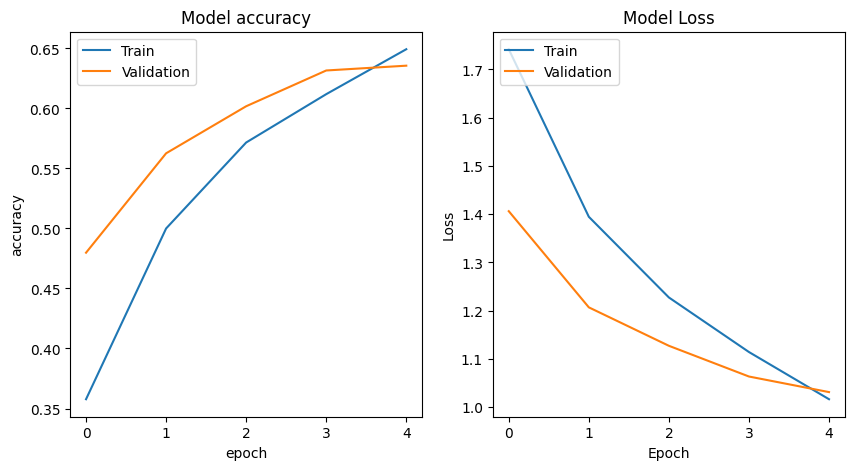

In [42]:
import matplotlib.pyplot as plt

def plot_history(history):

    plt.figure(figsize=(10, 5))

    # summarize history for mean_squared_error
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # summarize history for loss
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

print(history.history.keys())
plot_history(history)

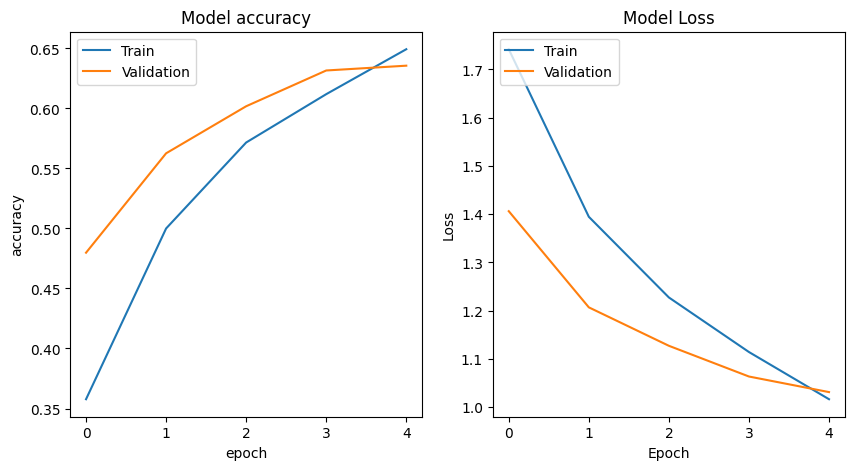

In [44]:
plot_history(history)

In [46]:
_, acc = model.evaluate(
    test_images,
    test_labels,
    batch_size=256,
    verbose=0
)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 10.0%
